# **BMEN 415 - Final Project**
**Classification Model 2: Support Vector Machines (Kernel = Linear)**

### **Data Preprocessing, Model Creation & Training the Model**

#### Importing Libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing Training Dataset

In [41]:
df_train = pd.read_csv('Classification - Training.csv')
df_train = df_train.drop(df_train.columns[0:2], axis = 1)
df_train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,14.47,24.99,95.81,656.4,0.08837,0.12300,0.100900,0.038900,0.1872,...,16.22,31.73,113.50,808.9,0.13400,0.4202,0.40400,0.12050,0.3187,0.10230
1,B,11.87,21.54,76.83,432.0,0.06613,0.10640,0.087770,0.023860,0.1349,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.32180,0.08750,0.2305,0.09952
2,M,16.27,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.084880,0.1948,...,19.28,30.38,129.80,1121.0,0.15900,0.2947,0.35970,0.15830,0.3103,0.08200
3,M,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.192100,0.096640,0.1902,...,23.72,35.90,159.80,1724.0,0.17820,0.3841,0.57540,0.18720,0.3258,0.09720
4,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,0.1931,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.37910,0.15140,0.2837,0.08019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,...,11.88,22.94,78.28,424.8,0.12130,0.2515,0.19160,0.07926,0.2940,0.07587
451,B,13.15,15.34,85.31,538.9,0.09384,0.08498,0.092930,0.034830,0.1822,...,14.77,20.50,97.67,677.3,0.14780,0.2256,0.30090,0.09722,0.3849,0.08633
452,B,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,...,11.87,21.18,75.39,437.0,0.15210,0.1019,0.00692,0.01042,0.2933,0.07697
453,B,10.26,12.22,65.75,321.6,0.09996,0.07542,0.019230,0.019680,0.1800,...,11.38,15.65,73.23,394.5,0.13430,0.1650,0.08615,0.06696,0.2937,0.07722


#### Checking for any Missing Values in the Dataset

In [42]:
df_train.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Correlation Heat Map

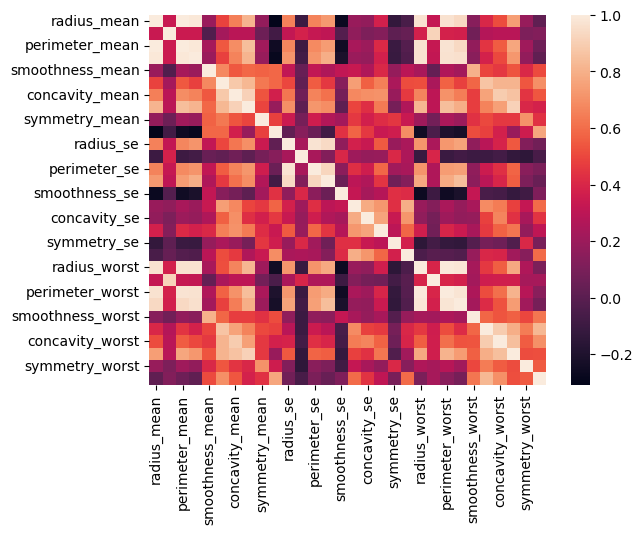

In [43]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df_train.corr()
sns.heatmap(correlations)
plt.show()

#### Splitting Training Dataset into Independent and Dependent Variable (X and y Datasets)

In [44]:
X = df_train.drop(columns = ['diagnosis'])
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,14.47,24.99,95.81,656.4,0.08837,0.12300,0.100900,0.038900,0.1872,0.06341,...,16.22,31.73,113.50,808.9,0.13400,0.4202,0.40400,0.12050,0.3187,0.10230
1,11.87,21.54,76.83,432.0,0.06613,0.10640,0.087770,0.023860,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.32180,0.08750,0.2305,0.09952
2,16.27,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.084880,0.1948,0.06277,...,19.28,30.38,129.80,1121.0,0.15900,0.2947,0.35970,0.15830,0.3103,0.08200
3,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.192100,0.096640,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.17820,0.3841,0.57540,0.18720,0.3258,0.09720
4,15.46,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.37910,0.15140,0.2837,0.08019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,10.60,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.12130,0.2515,0.19160,0.07926,0.2940,0.07587
451,13.15,15.34,85.31,538.9,0.09384,0.08498,0.092930,0.034830,0.1822,0.06207,...,14.77,20.50,97.67,677.3,0.14780,0.2256,0.30090,0.09722,0.3849,0.08633
452,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,...,11.87,21.18,75.39,437.0,0.15210,0.1019,0.00692,0.01042,0.2933,0.07697
453,10.26,12.22,65.75,321.6,0.09996,0.07542,0.019230,0.019680,0.1800,0.06569,...,11.38,15.65,73.23,394.5,0.13430,0.1650,0.08615,0.06696,0.2937,0.07722


In [45]:
y = pd.DataFrame(df_train['diagnosis'], columns = ['diagnosis'])
y

,diagnosis
0,B
1,B
2,M
3,M
4,M
...,...
450,B
451,B
452,B
453,B


#### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_train = sc.fit_transform(X)

In [47]:
print(X_train)

[[ 0.15253647  1.3263287   0.21394939 ...  0.10028727  0.45872586
   0.95709079]
 [-0.62003651  0.53295746 -0.60416121 ... -0.40202909 -0.96831616
   0.80729055]
 [ 0.68739468  0.34208844  0.6919708  ...  0.67566783  0.3228171
  -0.13677429]
 ...
 [-1.15192329 -0.94570256 -1.1675282  ... -1.57531834  0.04776365
  -0.40781574]
 [-1.09843747 -1.6102947  -1.08175158 ... -0.71468297  0.05423549
  -0.39434449]
 [ 0.9637381   1.21824624  1.00662872 ...  1.1566738   0.66258901
   2.65985614]]


#### Creating the Model & Training the SVM on the Training Set

In [48]:
from sklearn.svm import SVC

classifier = SVC(gamma='auto', kernel = 'linear')
classifier.fit(X_train, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(gamma='auto', kernel='linear')

### **Implementing Testing Data to the Model Created**

#### Importing the Testing Data

In [49]:
df_test = pd.read_csv('Classification - Testing.csv')
df_test = df_test.drop(df_test.columns[0:2], axis = 1)
df_test

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,12.87,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,0.1861,...,14.45,24.38,95.14,626.9,0.1214,0.16520,0.07127,0.06384,0.3313,0.07735
1,M,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,...,21.58,29.33,140.50,1436.0,0.1558,0.25670,0.38890,0.19840,0.3216,0.07570
2,M,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.08665,0.1966,...,22.25,24.90,145.40,1549.0,0.1503,0.22910,0.32720,0.16740,0.2894,0.08456
3,B,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
4,M,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,...,25.58,27.00,165.30,2010.0,0.1211,0.31720,0.69910,0.21050,0.3126,0.07849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,M,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,...,17.91,31.67,115.90,988.6,0.1084,0.18070,0.22600,0.08568,0.2683,0.06829
110,M,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,...,17.79,28.45,123.50,981.2,0.1415,0.46670,0.58620,0.20350,0.3054,0.09519
111,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.48,37.16,82.28,474.2,0.1298,0.25170,0.36300,0.09653,0.2112,0.08732
112,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890


#### Checking for any Missing Values in the Dataset

In [50]:
df_test.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Splitting Testing Dataset into Independent and Dependent Variable (X and y Datasets)

In [51]:
X_test = df_test.drop(columns = ['diagnosis'])
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.87,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,0.1861,0.06347,...,14.45,24.38,95.14,626.9,0.1214,0.16520,0.07127,0.06384,0.3313,0.07735
1,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.05580,...,21.58,29.33,140.50,1436.0,0.1558,0.25670,0.38890,0.19840,0.3216,0.07570
2,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.08665,0.1966,0.06213,...,22.25,24.90,145.40,1549.0,0.1503,0.22910,0.32720,0.16740,0.2894,0.08456
3,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
4,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.1211,0.31720,0.69910,0.21050,0.3126,0.07849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,0.05443,...,17.91,31.67,115.90,988.6,0.1084,0.18070,0.22600,0.08568,0.2683,0.06829
110,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,...,17.79,28.45,123.50,981.2,0.1415,0.46670,0.58620,0.20350,0.3054,0.09519
111,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.48,37.16,82.28,474.2,0.1298,0.25170,0.36300,0.09653,0.2112,0.08732
112,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890


In [52]:
y_test = pd.DataFrame(df_test['diagnosis'], columns = ['diagnosis'])
y_test

,diagnosis
0,B
1,M
2,M
3,B
4,M
...,...
109,M
110,M
111,B
112,M


#### Feature Scaling

In [53]:
X_test = sc.transform(X_test)

#### Predicting

In [54]:
y_pred = classifier.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M'], dtype=object)

#### Comparing Predictions with the Actual

In [55]:
y_pred = pd.DataFrame(y_pred, columns = ['y Predicted'])
df_predictions = pd.concat([y_test, y_pred], axis = 1) 
df_predictions.columns = ['y Actual', 'y Predicted']
df_predictions

,y Actual,y Predicted
0,B,B
1,M,M
2,M,M
3,B,B
4,M,M
...,...,...
109,M,B
110,M,M
111,B,B
112,M,M


#### Counting Malignant and Benign Occurence in the Actual and Predicted Datasets

In [56]:
df_counts_a = df_predictions['y Actual'].value_counts().reset_index()
df_counts_p = df_predictions['y Predicted'].value_counts().reset_index()
df_counts = pd.concat([df_counts_a, df_counts_p], axis = 1)
df_counts.columns = ['y Actual Value', 'y Actual Count', 'y Predicted Value', 'y Predicted Count']
df_counts


,y Actual Value,y Actual Count,y Predicted Value,y Predicted Count
0,B,68,B,71
1,M,46,M,43


#### Visual Comparisons

In [57]:
import plotly.graph_objects as go

samples = ['Benign', 'Malignant']

fig = go.Figure()

fig.add_trace(go.Bar(
    x = samples,
    y = df_counts['y Actual Count'],
    name = 'y Actual',
    marker_color= 'indianred'
))

fig.add_trace(go.Bar(
    x = samples,
    y = df_counts['y Predicted Count'],
    name = 'y Predicted',
    marker_color = 'lightsalmon'
))

fig.update_layout(
    title="y Actual vs y Predicted",
    yaxis_title = 'Count',
    barmode='group', 
    xaxis_tickangle=-45
)

fig.show()

#### Confusion Matrix & Metrics

F1 Score:  [0.97841727 0.96629213]
Precison:  [0.95774648 1.        ]
Recall:  [1.         0.93478261]
Accuracy:  0.9736842105263158


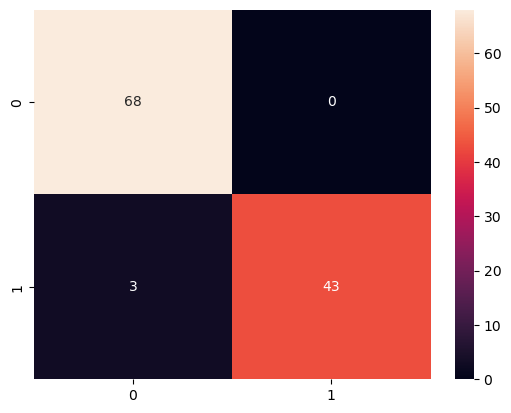

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

print('F1 Score: ', f1_score(y_test, y_pred, average = None))
print('Precison: ', precision_score(y_test, y_pred, average = None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('Accuracy: ', accuracy_score(y_test, y_pred))